<a href="https://colab.research.google.com/github/yalagamsrinivas/Melanoma-Detection-Assignment/blob/master/Starter_code_Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:


1.Actinic keratosis

2.Basal cell carcinoma

3.Dermatofibroma

4.Melanoma

5.Nevus

6.Pigmented benign keratosis

7.Seborrheic keratosis

8.Squamous cell carcinoma

9.Vascular lesion

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
!pip3 freeze
#check python installed python packages

In [7]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [8]:
!pwd

#!mkdir /content/gdrive/MyDrive/data/Skin_Data_Original
#!unzip /content/gdrive/MyDrive/data/CNN_assignment.zip -d /content/gdrive/MyDrive/data/Skin_Data_Original
#!unzip /content/gdrive/MyDrive/data/CNN_assignment.zip -d /content/gdrive/MyDrive/data/

/content


In [9]:
# Defining the path for train and test images(original dataset)
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/data/Skin_Data_Original/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/data/Skin_Data_Original/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [10]:
# Defining the path for train and test images(here we also save augmented data in train folder)
## Todo: Update the paths of the train and test dataset
data_dir_train_augmented = pathlib.Path("/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test_temp = pathlib.Path('/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [12]:
image_count_train_augmented = len(list(data_dir_train_augmented.glob('*/*.jpg')))
print(image_count_train_augmented)#augmentation is not yet done
image_count_test = len(list(data_dir_test_temp.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [13]:
batch_size = 32
img_height = 180
img_width = 180
seed=123

Use 80% of the images for training, and 20% for validation.

In [15]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=seed,
    validation_split = 0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [16]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=seed,
    validation_split = 0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [17]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=seed
)

Found 118 files belonging to 9 classes.


In [18]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

27


<ipython-input-19-85025475707f>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i+1)


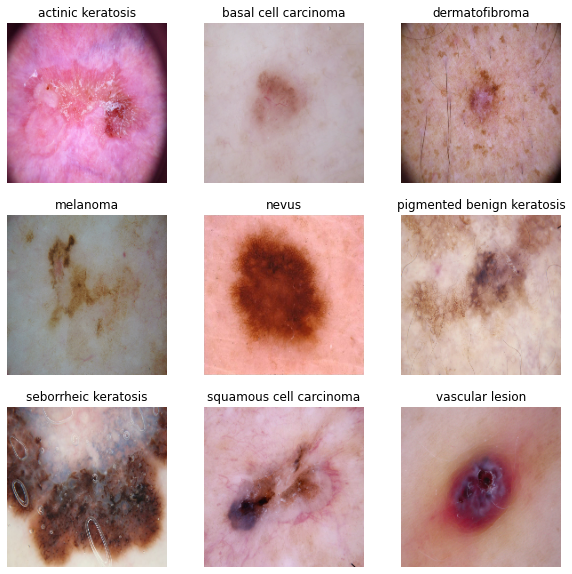

In [19]:
### your code goes here, you can use training data to visualize
# https://keras.io/examples/vision/image_classification_from_scratch/
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")
#https://stackoverflow.com/questions/72166657/displaying-images-from-each-class-of-a-batched-tensorflow-dataset
import random
# Selecting a random batch from train_ds
# Note that if a particular batch doesnt have all the classes (six in this case, then we only print the existing classes)
num_batch_trainds = train_ds.cardinality().numpy()
random_batch = random.randint(1,num_batch_trainds)
print(random_batch)

plt.figure(figsize=(10, 10))
# Getting the image related to a specific class and plotting them 
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(random_batch):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

4


<ipython-input-20-0c200b1c277d>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i+1)


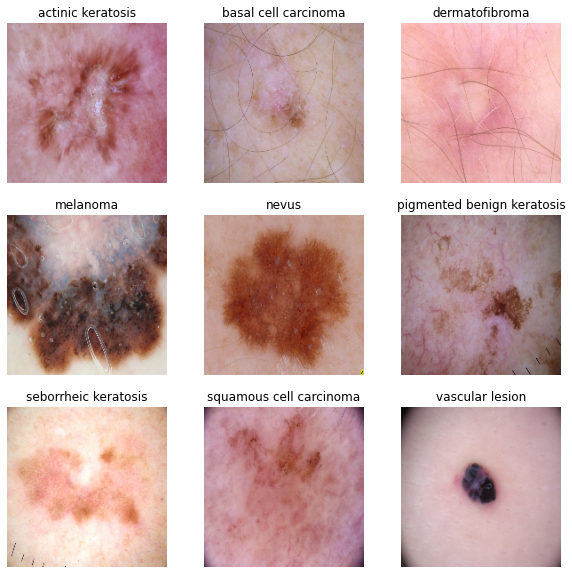

In [20]:
### your code goes here, you can use validation data to visualize
# Selecting a random batch from train_ds
# Note that if a particular batch doesnt have all the classes (six in this case, then we only print the existing classes)
num_batch_trainds = val_ds.cardinality().numpy()
random_batch = random.randint(1,num_batch_trainds)
print(random_batch)

plt.figure(figsize=(10, 10))
# Getting the image related to a specific class and plotting them 
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(random_batch):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [53]:
### Your code goes here, different cobination of layers
num_classes=9
model_base = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Conv2D(64, 3, activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Conv2D(64, 3, activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [42]:
### Todo, choose an appropirate optimiser and loss function
model_base.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [43]:
# View the summary of all layers
input_shape=(None,img_height, img_width,3)
model_base.build(input_shape)
model_base.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 253472)           

### Train the model

In [50]:
epochs = 20
history = model_base.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 30ms/step - loss: 0.2113 - accuracy: 0.9157 - val_loss: 49.6331 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1990 - accuracy: 0.9191 - val_loss: 7.1235 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1829 - accuracy: 0.9180 - val_loss: 4.5445 - val_accuracy: 0.4407
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1598 - accuracy: 0.9252 - val_loss: 5.9176 - val_accuracy: 0.3960
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1659 - accuracy: 0.9213 - val_loss: 14.5370 - val_accuracy: 0.3468
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1644 - accuracy: 0.9258 - val_loss: 18.0409 - val_accuracy: 0.2931
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 0.1572 - accuracy: 0.9219 - val_loss: 7.2402 - val_accuracy: 0.4183
Epoch 8/20

### Visualizing training results

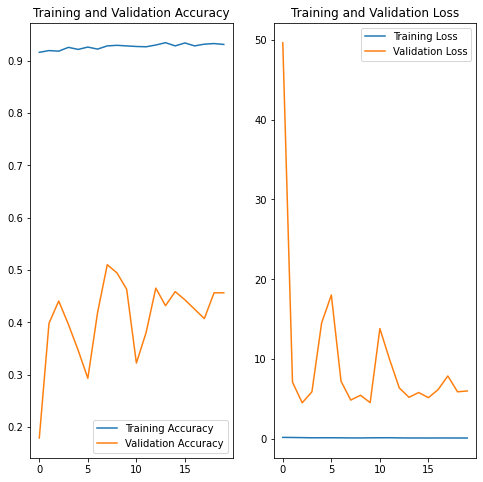

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Visualize Model Results

In [52]:
#show the results of trained model on train, validation and test dataset
result = model_base.evaluate(train_ds)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_base.evaluate(val_ds)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_base.evaluate(test_ds)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

56/56 [==============================] - 1s 9ms/step - loss: 0.1525 - accuracy: 0.9286
train loss:  0.15251195430755615
train accuracy:  0.9285714030265808
14/14 [==============================] - 0s 9ms/step - loss: 6.0236 - accuracy: 0.4564
val loss:  6.023592472076416
val accuracy:  0.4563758373260498
4/4 [==============================] - 3s 17ms/step - loss: 14.7452 - accuracy: 0.2373
test loss:  14.745163917541504
test accuracy:  0.23728813230991364


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
- Model is overfitting, since train data accuracy is 92% and validation data accuracy is 45%.

### Write your findings here
- Model is trained with different combinations of layers.
- Training data accuracy is increasing but validation data accuracy is not increasing due to overfitting.
- Need to add more data or better augementation startegy to introduce better generalization of the model.
- Next module ,I will try this augmentation strategy to improve model performance.

In [65]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
#https://stackoverflow.com/questions/50737814/is-data-augmentation-in-keras-applied-to-the-validation-set-when-using-imagedata
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range = 0.5,
    rotation_range=90,
    validation_split=0.2,
    horizontal_flip=True)
# train_datagen = ImageDataGenerator(
#         rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        data_dir_train,  # this is the target directory
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        subset="training",
        class_mode="sparse")

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
        data_dir_train,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        subset="validation",
        class_mode="sparse")
# this is a similar generator, for test data
test_generator = test_datagen.flow_from_directory(
        data_dir_test,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        class_mode="sparse")
#test datset generator
#test_it = datagen.flow_from_directory('data/test/', class_mode='binary', batch_size=64)
# evaluate model
#loss = model.evaluate_generator(test_it, steps=24)
# make a prediction
#yhat = model.predict_generator(predict_it, steps=24)
# confirm the iterator works
#batchX, batchy = train_it.next()
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )
# 
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes, name="outputs")
# ])

#reference: https://www.tensorflow.org/tutorials/images/classification#data_augmentation

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


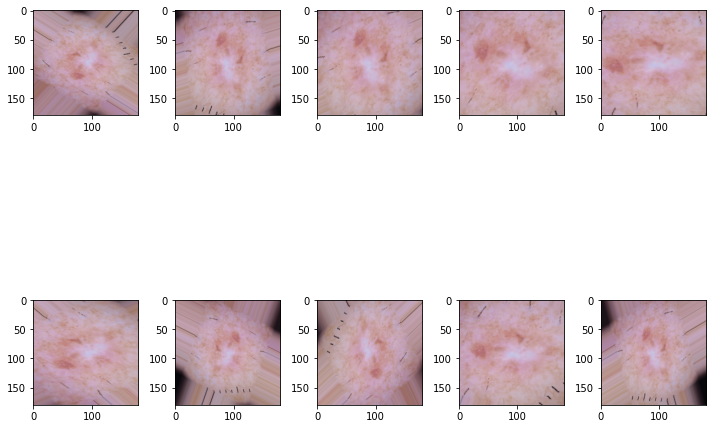

In [64]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()    
class_index=8    
augmented_images = [train_generator[0][0][class_index] for i in range(10)]
plotImages(augmented_images)

In [66]:
len(train_generator)

57

### Todo:
### Create the model, compile and train the model


In [67]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes=9
model_augmented_data = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [68]:
## Your code goes here
# fine-tune the model
model_augmented_data.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
input_shape=(None,img_height, img_width,3)
model_augmented_data.build(input_shape)
model_augmented_data.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 87, 87, 64)      

### Training the model

In [70]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model_augmented_data.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/30
57/57 [==============================] - 54s 954ms/step - loss: 1.4365 - accuracy: 0.4914 - val_loss: 3.2099 - val_accuracy: 0.2590
Epoch 2/30
57/57 [==============================] - 51s 899ms/step - loss: 1.4265 - accuracy: 0.5042 - val_loss: 2.2972 - val_accuracy: 0.1081
Epoch 3/30
57/57 [==============================] - 51s 895ms/step - loss: 1.3487 - accuracy: 0.5231 - val_loss: 2.2777 - val_accuracy: 0.2297
Epoch 4/30
57/57 [==============================] - 52s 922ms/step - loss: 1.3464 - accuracy: 0.5226 - val_loss: 2.5327 - val_accuracy: 0.2342
Epoch 5/30
57/57 [==============================] - 51s 896ms/step - loss: 1.3005 - accuracy: 0.5393 - val_loss: 2.5626 - val_accuracy: 0.3108
Epoch 6/30
57/57 [==============================] - 51s 891ms/step - loss: 1.2815 - accuracy: 0.5315 - val_loss: 2.2154 - val_accuracy: 0.2883
Epoch 7/30
57/57 [==============================] - 51s 897ms/step - loss: 1.2673 - accuracy: 0.5521 - val_loss: 2.1763 - val_accuracy: 0.3626

### Visualizing the results

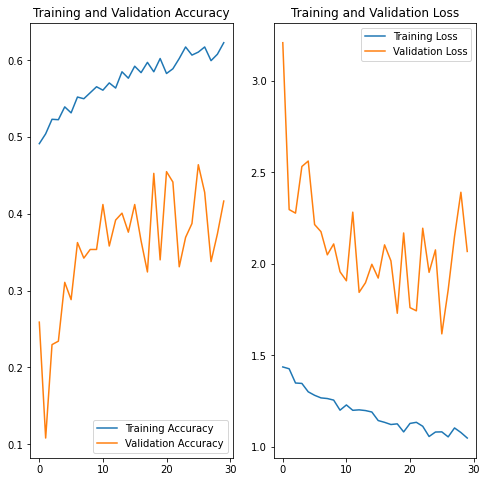

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Visualize Model Results

In [74]:
#show the results of trained model on train, validation and test dataset
result = model_augmented_data.evaluate(train_generator)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_augmented_data.evaluate(validation_generator)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_augmented_data.evaluate(test_generator)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

57/57 [==============================] - 46s 808ms/step - loss: 1.4351 - accuracy: 0.5359
train loss:  1.4350614547729492
train accuracy:  0.5359331369400024
14/14 [==============================] - 11s 775ms/step - loss: 2.0655 - accuracy: 0.4212
val loss:  2.065451145172119
val accuracy:  0.4211711585521698
4/4 [==============================] - 7s 2s/step - loss: 2.5789 - accuracy: 0.3390
test loss:  2.5788753032684326
test accuracy:  0.33898305892944336
57/57 [==============================] - 38s 674ms/step - loss: 1.4349 - accuracy: 0.5404
train loss:  1.4348840713500977
train accuracy:  0.5403899550437927
14/14 [==============================] - 12s 853ms/step - loss: 2.0755 - accuracy: 0.4167
val loss:  2.0755088329315186
val accuracy:  0.4166666567325592
4/4 [==============================] - 7s 2s/step - loss: 2.5789 - accuracy: 0.3390
test loss:  2.5788755416870117
test accuracy:  0.33898305892944336


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- Model is underfitting after using augmentation strategy from ImageDataGenerator
- Since there is huge class imbalance of the data, data augmentation did not help much.
- There is no improvement from previous model.
- Need to do class balancing for better generalization of the model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [75]:
## Your code goes here.
dict_temp={}
print("get sample size of each class")
for i in range(len(class_names)):
  print(class_names[i],' : ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))
  dict_temp[class_names[i]] = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))

get sample size of each class
actinic keratosis  :  114
basal cell carcinoma  :  376
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


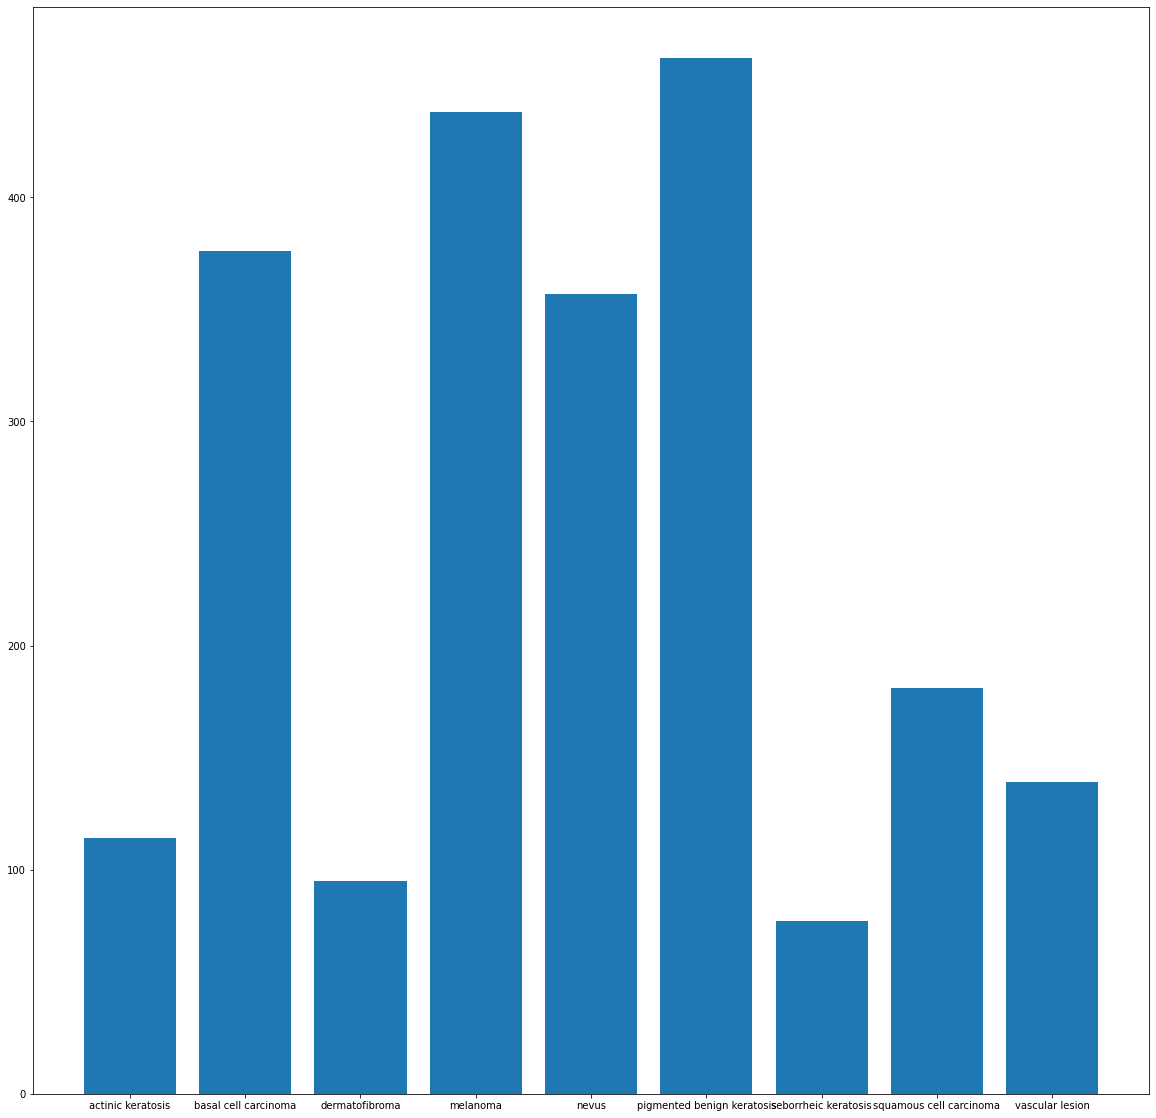

In [77]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(20)
plt.bar(range(len(dict_temp)), list(dict_temp.values()), align='center')
plt.xticks(range(len(dict_temp)), list(dict_temp.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

- seborrheic keratosis(77) class has least number of sample

#### - Which classes dominate the data in terms proportionate number of samples?

- pigmented benign keratosis(462) class has more number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=str(data_dir_train_augmented)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F724D3F9C70>: 100%|██████████| 500/500 [00:22<00:00, 22.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F71CF12DEB0>: 100%|██████████| 500/500 [00:17<00:00, 27.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71C370DB80>: 100%|██████████| 500/500 [00:18<00:00, 26.91 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F724D4226D0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F71CE1C5E20>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71C3BBE4C0>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F71CF0D18E0>: 100%|██████████| 500/500 [00:42<00:00, 11.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F724D401250>: 100%|██████████| 500/500 [00:18<00:00, 27.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71CF763AC0>: 100%|██████████| 500/500 [00:19<00:00, 26.10 Samples/s]


In [78]:
print(data_dir_train_augmented)

/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [79]:
image_count_train_augmented = len(list(data_dir_train_augmented.glob('*/output/*.jpg')))
print(image_count_train_augmented)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train_augmented, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train_augmented, '*','output', '*.jpg'))]
lesion_list_new

In [82]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
list(dataframe_dict_new.items())

In [84]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = df2

In [85]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [86]:
new_df.head()

,Path,Label
0,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
1,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
2,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
3,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
4,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [87]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [88]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_augmented,
  seed=seed,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset and test dataset

In [89]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_augmented,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [90]:
## your code goes here
num_classes=9
model_augmented_updated = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [91]:
## your code goes here
#model.compile = yes, new weights and you need to train it
model_augmented_updated.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
input_shape=(None,img_height, img_width,3)
model_augmented_updated.build(input_shape)
model_augmented_updated.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)       

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model_augmented_updated.fit(
        train_ds_augmented,
        steps_per_epoch=len(train_ds_augmented),
        epochs=epochs,
        validation_data=val_ds,
        validation_steps=len(val_ds))

Epoch 1/50
109/169 [==================>...........] - ETA: 10:47 - loss: 1.8574 - accuracy: 0.3658

Visualize Model Results

In [ ]:
#show the results of trained model on train, validation and test dataset
result = model_augmented_updated.evaluate(train_ds_augmented)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_augmented_updated.evaluate(val_ds)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_augmented_updated.evaluate(test_ds)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

169/169 [==============================] - 26s 145ms/step - loss: 1.9919 - accuracy: 0.6205
train loss:  1.9918911457061768
train accuracy:  0.6205489635467529
43/43 [==============================] - 6s 120ms/step - loss: 2.3308 - accuracy: 0.5776
val loss:  2.3308026790618896
val accuracy:  0.5775797963142395
4/4 [==============================] - 4s 20ms/step - loss: 6.4577 - accuracy: 0.3136
test loss:  6.457699298858643
test accuracy:  0.31355932354927063


#### **Todo:**  Visualize the model results

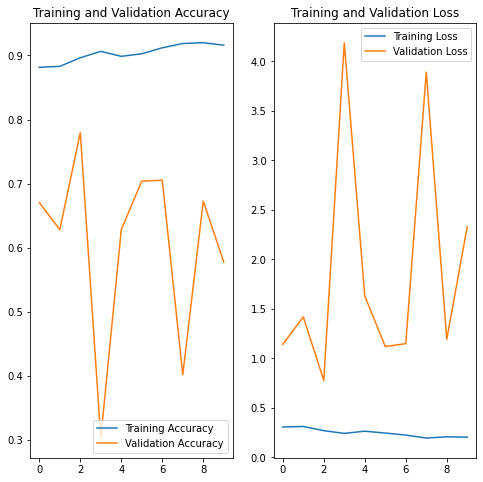

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 118ms/step
actual class: basal cell carcinoma
predictive class: pigmented benign keratosis


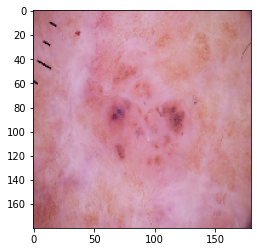

In [ ]:
#show the prediction on test data(one sample)
from glob import glob
class_index = 1
path_test_image = os.path.join(data_dir_test, class_names[class_index], '*')
test_image = glob(path_test_image)
image_index = 10
test_image = load_img(test_image[image_index],target_size=(180,180,3))
plt.imshow(test_image)
#plt.grid(False)
# Pre-processing the image
# img = load_img(test_image[image_index], target_size = (180,180))
# img_tensor = img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis = 0)
# img_tensor = img_tensor / 255.
# # Print image tensor shape
# print(img_tensor.shape)
# # Print image
# import matplotlib.pyplot as plt
# plt.imshow(img_tensor[0])
# plt.show()

img = np.expand_dims(test_image,axis=0)
prediction_class_prob = model_augmented_updated.predict(img)
prediction_class_index = np.argmax(prediction_class_prob)
# prediction_class_prob = model.predict(test_image)
# prediction_class_index = np.argmax(prediction_class_prob,axis=1)
pred_class_name = class_names[prediction_class_index]
print("actual class: "+ class_names[class_index] +'\n'+ "predictive class: "+pred_class_name )

Visualize Output of Intermediate Layers channel wise

1/1 [==============================] - 0s 67ms/step
(1, 87, 87, 64)


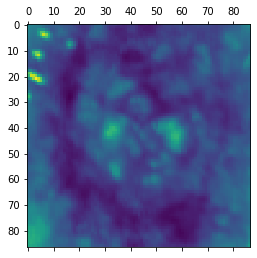

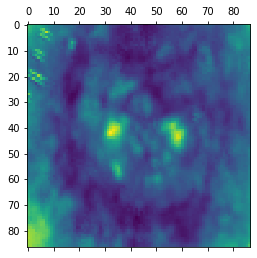

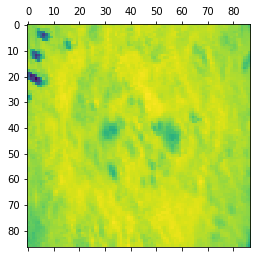

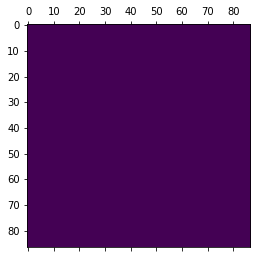

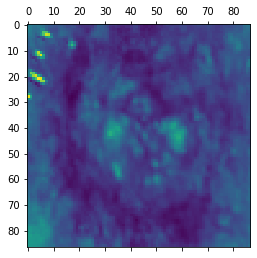

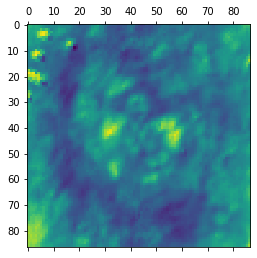

In [ ]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
#https://www.geeksforgeeks.org/visualizing-representations-of-outputs-activations-of-each-cnn-layer/
from keras import models
from keras import layers
layer_outputs = [layer.output for layer in model_augmented_updated.layers[:8]]
activation_model = models.Model(inputs = model_augmented_updated.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[6]

# shape of first layer activation
print(first_layer_activation.shape)

# 0th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis')

# 1th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
# 2th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')
# 8th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 8], cmap ='viridis')
# 16th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 16], cmap ='viridis')
# 24th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 24], cmap ='viridis')


Print Each layer name

In [ ]:
layer_names = []

for layer in model_augmented_updated.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)


['rescaling_3', 'conv2d_22', 'batch_normalization_22', 'max_pooling2d_22', 'dropout_20', 'conv2d_23', 'batch_normalization_23', 'max_pooling2d_23']


Function to Visualize Output of Convolution layers

In [ ]:
def visualize_conv_layer(layer_name):
  
  layer_output=model_augmented_updated.get_layer(layer_name).output  #get the Output of the Layer

  intermediate_model=tf.keras.models.Model(inputs=model_augmented_updated.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about

  intermediate_prediction=intermediate_model.predict(img_tensor) #predicting in the Intermediate Node
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8)) 

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='GnBu')

      img_index=img_index+1 #Increment the Index number of img_index variable
        
print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


Visualize particular layer

1/1 [==============================] - 0s 49ms/step
(1, 178, 178, 32)


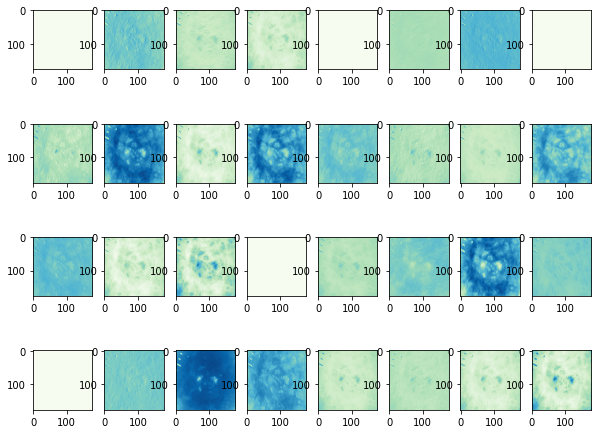

In [ ]:
visualize_conv_layer(layer_names[2])

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Model is trainined on augmented and class balanced data